### PROBLEM DEFINITION

- As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

### OBJECTIVE

- To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### TARGET VARIABLE

- Price

### Load the dataset
#### Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("used_cars_data-1.csv")

### Explore dataset

In [3]:
df.shape

(7253, 14)

- There are 7253 rows and 14 columns in our dataset

In [4]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [5]:
df.sample(500)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7111,7111,Chevrolet Enjoy Petrol LTZ 7 Seater,Mumbai,2013,39000,Petrol,Manual,First,13.7 kmpl,1399 CC,98.82 bhp,7.0,11.30,NaN
27,27,Maruti Alto K10 2010-2014 VXI,Hyderabad,2013,54000,Petrol,Manual,Second,20.92 kmpl,998 CC,67.1 bhp,5.0,4.36,2.75
4106,4106,Maruti Baleno Delta 1.3,Hyderabad,2017,20000,Diesel,Manual,First,27.39 kmpl,1248 CC,74 bhp,5.0,8.80,8.50
3196,3196,Ford Endeavour 3.2 Titanium AT 4X4,Chennai,2019,9000,Diesel,Automatic,First,10.91 kmpl,3198 CC,197 bhp,7.0,35.29,35.50
6050,6050,Volkswagen Polo GT TDI,Pune,2014,68000,Diesel,Manual,First,15.11 kmpl,1598 CC,103.6 bhp,5.0,10.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2588,Mitsubishi Montero 3.2 GLS,Chennai,2007,179032,Diesel,Manual,First,11.56 kmpl,3200 CC,199.3 bhp,7.0,33.21,7.50
1130,1130,Hyundai Grand i10 CRDi Magna,Kochi,2016,57738,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,7.45,5.04
3102,3102,Ford Figo Diesel EXI,Pune,2010,129986,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0,7.65,3.20
3722,3722,Maruti SX4 Green Vxi (CNG),Kochi,2015,61000,CNG,Manual,First,22.1 km/kg,1586 CC,85.7 bhp,5.0,7.88,3.89


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


 - We have 3 float datatypes, 3 integer datatypes and 8 object/string datatypes

In [7]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


- The manufacturing year ranges from 1996 to 2019, with the median of 2014 and mean of 2013
- The Kilometers_Driven ranges from 171km to 6500000km. The mean is 58699.06km and the median is 53416km
- The maximum number of seats is 10 and the minimum number of seats is 0. (Definitely as a result of the missing value)
- The New_Price ranges from 3.91 dollars to 375 dollars, with the average new_price being 21.31 dollars and median new_price of 11.3 dollars
- The maximum price of used car is 160 dollars and the minimum price is 0.44 dollars. The average price for used car is 9.479 dollars and the median price is 5.64 dollars


In [8]:
cat_df = df.select_dtypes(include = "object")

cat_df.describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


- There 2041 unique car brand names and the most bought brand is  Mahindra XUV500 W8 2WD
- Mumbai is the location with the highest number of cars sold, totalling 949
- The most used fuel_type is  diesel with a frequency of 3852
- The manual transmission is the most use transmission method with 5204 cars using manual
- 5952 cars sold are First-hand, making it the highest owner type of cars sold
- 207 cars sold have mileage of 17.0 kmpl, making it the highest mileage of cars sold
- The highest engine sold 1197 CC with a total 207
- The highest maximum power of the engine of cars sold is 74bhp

### DATA CLEANING

In [9]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- There are 2 missing values in Mileage
- There 46 missing values in Engine
- There are 175 missing values in Power
- There are 53 missing values in Seats
- There sre 1234 missing values in Price

### Treating the Seats feature

- I'll replace the 0 value with np.nan and I'll replace all missing numbers with the median value of 5 as shown below

In [10]:
df["Seats"].describe()

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [11]:
df["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [12]:
df['Seats'].replace(0, np.nan, inplace = True)

In [13]:
df["Seats"].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [14]:
df["Seats"].isnull().sum()

54

In [15]:
df["Seats"].fillna(df["Seats"].median(), inplace = True)

In [16]:
# Sanity Check

df["Seats"].isnull().sum()

0

### TREATING THE PRICE FEATURE

- I'll replace all missing price values with the median price of a used car

In [17]:
df["Price"].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [18]:
df["Price"].isnull().sum()

1234

- 1234 missing price values

In [19]:
df["Price"].fillna(df["Price"].median(), inplace = True)

In [20]:
# Sanity check

df["Price"].isnull().sum()

0

### TREATING MILEAGE FEATURE

- Here we will drop the missing value since there are just 2
- We will also remove the S.I unit and change datatype to a float

In [21]:
df.dropna(subset = ["Mileage"], inplace = True)

df.reset_index(drop = True, inplace = True)

In [22]:
df["Mileage"].isnull().sum()

0

In [23]:
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
        
print(f"The number of rows with Km/Kg : {kmkg} ")
print(f"The number of rows with Kmpl : {kmpl} ")

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 


- 1 liter of mileage = 0.710 to 0.775 kilograms. The median  ~= 0.742
- So to change from km/kg to kmpl we will multiply by 1/0.742, which is ~= 1.348

In [24]:
Correct_Mileage= []
for i in df["Mileage"]:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.348
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

In [25]:
df["Mileage"] = Correct_Mileage

df["Mileage"]

0       35.8568
1       19.6000
2       18.0000
3       20.7000
4       15.0000
         ...   
7246    20.5000
7247    17.2000
7248    23.0000
7249    17.0000
7250    10.0000
Name: Mileage, Length: 7251, dtype: float64

In [26]:
# Sanity Check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Name               7251 non-null   object 
 2   Location           7251 non-null   object 
 3   Year               7251 non-null   int64  
 4   Kilometers_Driven  7251 non-null   int64  
 5   Fuel_Type          7251 non-null   object 
 6   Transmission       7251 non-null   object 
 7   Owner_Type         7251 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7205 non-null   object 
 10  Power              7076 non-null   object 
 11  Seats              7251 non-null   float64
 12  New_Price          7251 non-null   float64
 13  Price              7251 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 793.2+ KB


### TREATING ENGINE FEATURE

- Here we will remove the S.I unit and we wil drop the missing values since it's less than 1% of the data

In [27]:
df["Engine"].isnull().sum()

46

- There are 46 missing values in the engine feature

In [28]:
Correct_Engine = []
for i in df["Engine"]:
    if str(i).endswith('CC'):
        i = i[:-3]
        i = float(i)
        Correct_Engine.append(float(i))
    else:
        Correct_Engine.append(float(i))

In [29]:
df["Engine"] = Correct_Engine

df["Engine"]

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7246    1598.0
7247    1197.0
7248    1461.0
7249    1197.0
7250    2148.0
Name: Engine, Length: 7251, dtype: float64

In [30]:
df["Engine"].describe()

count    7205.000000
mean     1616.762665
std       595.085712
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

In [31]:
df.dropna(subset = ["Engine"], inplace = True)

df.reset_index(drop = True, inplace = True)

In [32]:
# Sanity Check

df["Engine"].isnull().sum()

0

### TREATING POWER FEATURE

- We"ll remove the S.I unit of Power and drop the missing values

In [33]:
Correct_Power = []
for i in df["Power"]:
    if str(i).endswith('bhp'):
        i = i[:-4]
        i = float(i)
        Correct_Power.append(float(i))
    else:
        Correct_Power.append(float(i))

In [34]:
df["Power"] = Correct_Power

df["Power"]

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7200    103.60
7201    103.60
7202     63.10
7203    103.60
7204    170.00
Name: Power, Length: 7205, dtype: float64

In [35]:
df["Power"].isnull().sum()

129

- There are 129 missing values in the power feature

In [36]:
df.dropna(subset = ["Power"], inplace = True)

df.reset_index(drop = True, inplace = True)

In [37]:
# Sanity Check

df["Power"].isnull().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7076 entries, 0 to 7075
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7076 non-null   int64  
 1   Name               7076 non-null   object 
 2   Location           7076 non-null   object 
 3   Year               7076 non-null   int64  
 4   Kilometers_Driven  7076 non-null   int64  
 5   Fuel_Type          7076 non-null   object 
 6   Transmission       7076 non-null   object 
 7   Owner_Type         7076 non-null   object 
 8   Mileage            7076 non-null   float64
 9   Engine             7076 non-null   float64
 10  Power              7076 non-null   float64
 11  Seats              7076 non-null   float64
 12  New_Price          7076 non-null   float64
 13  Price              7076 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 774.1+ KB


- Our data has been cleaned and there are no missing values

### ADDING A NEW FEATURE FOR TOTAL NUMBER OF YEARS OF USED CAR

- Here we will turn the date to number of years by creating a new column called current year (2023) and substracting the actual year from it

In [39]:
df["Current_Year"] = 2023

In [40]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Current_Year
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,35.8568,998.0,58.16,5.0,5.51,1.75,2023
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6000,1582.0,126.20,5.0,16.06,12.50,2023
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0000,1199.0,88.70,5.0,8.61,4.50,2023
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7000,1248.0,88.76,7.0,11.27,6.00,2023
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0000,1968.0,140.80,5.0,53.14,17.74,2023


In [41]:
df["No_Years"] = df["Current_Year"] - df["Year"]

In [42]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Current_Year,No_Years
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,35.8568,998.0,58.16,5.0,5.51,1.75,2023,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6000,1582.0,126.20,5.0,16.06,12.50,2023,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0000,1199.0,88.70,5.0,8.61,4.50,2023,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7000,1248.0,88.76,7.0,11.27,6.00,2023,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0000,1968.0,140.80,5.0,53.14,17.74,2023,10


In [43]:
df.drop(["Year"], axis = 1, inplace = True)

In [44]:
df.head()

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Current_Year,No_Years
0,0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,35.8568,998.0,58.16,5.0,5.51,1.75,2023,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.6000,1582.0,126.20,5.0,16.06,12.50,2023,8
2,2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.0000,1199.0,88.70,5.0,8.61,4.50,2023,12
3,3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.7000,1248.0,88.76,7.0,11.27,6.00,2023,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.0000,1968.0,140.80,5.0,53.14,17.74,2023,10


In [45]:
df.drop(["Current_Year"], axis = 1, inplace = True)

In [46]:
df.head()

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No_Years
0,0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,35.8568,998.0,58.16,5.0,5.51,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.6000,1582.0,126.20,5.0,16.06,12.50,8
2,2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.0000,1199.0,88.70,5.0,8.61,4.50,12
3,3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.7000,1248.0,88.76,7.0,11.27,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.0000,1968.0,140.80,5.0,53.14,17.74,10


#### Data Visualization

##### Univariate Analysis: Numerical Features

- Here we create a function for histogram boxplots and we use it to check the distribution of the numerical features

In [47]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [48]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'No_Years'],
      dtype='object')

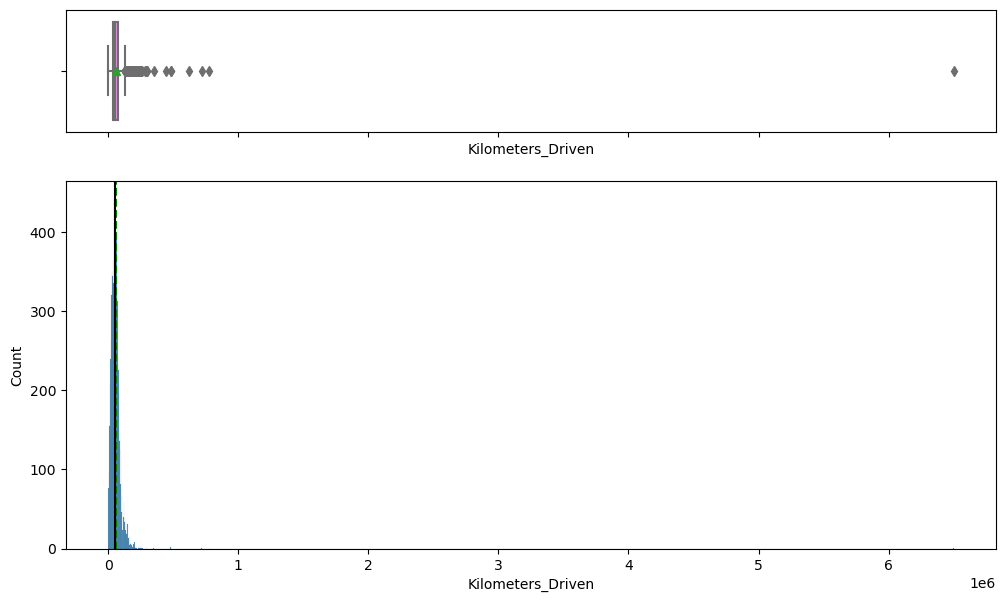

In [49]:
histogram_boxplot(data = df, feature = "Kilometers_Driven")

- The Kilometers_Driven looks a little normally distributed and there are outliers on the upper quartile

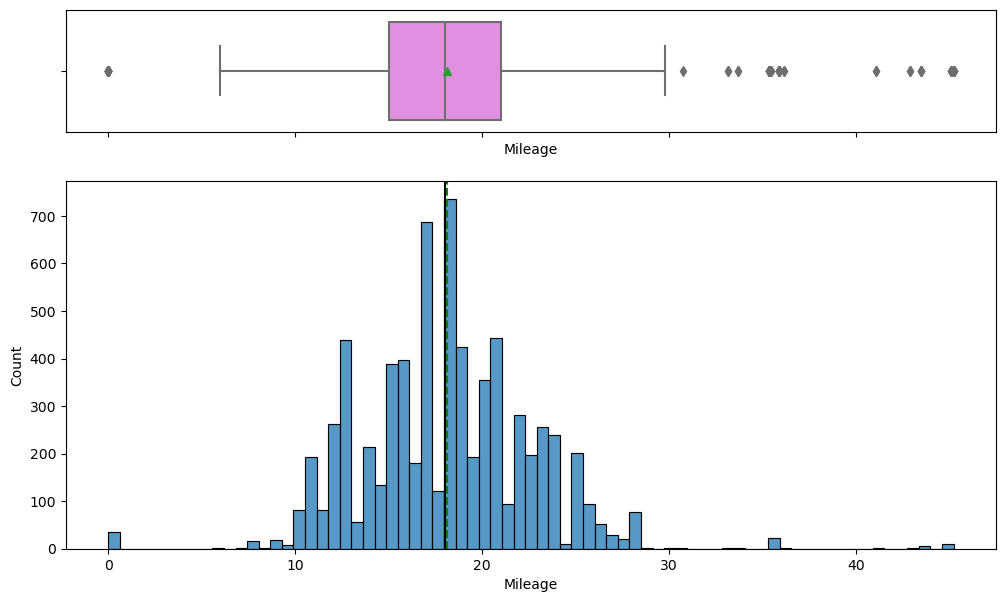

In [50]:
histogram_boxplot(data = df, feature = "Mileage")

- The Mileage is normally distributed but there are outliers after the upper quartile

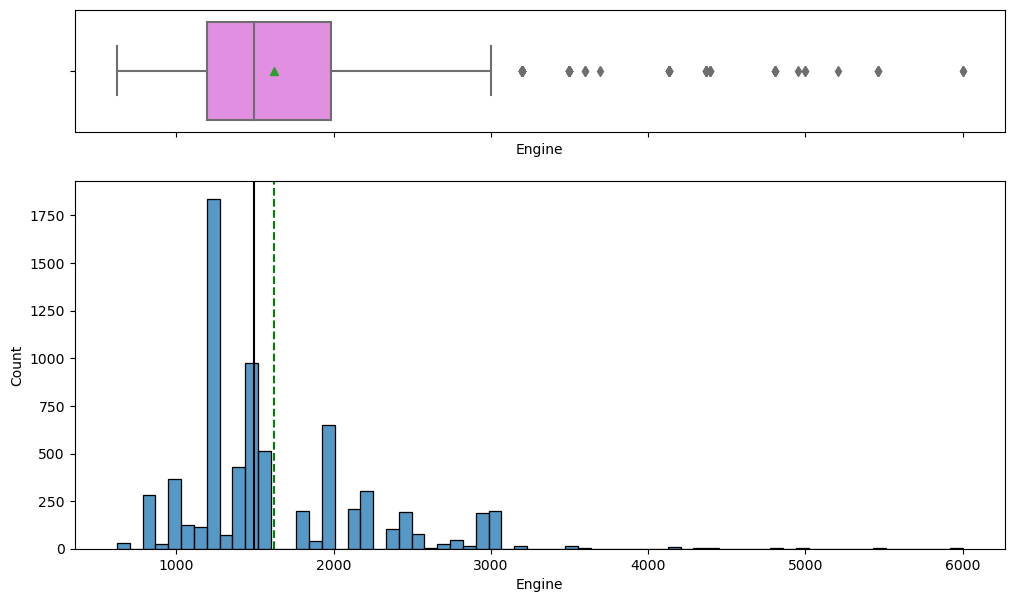

In [51]:
histogram_boxplot(data = df, feature = "Engine")

- The Engine is rightly skewed with outliers after the upper quartile

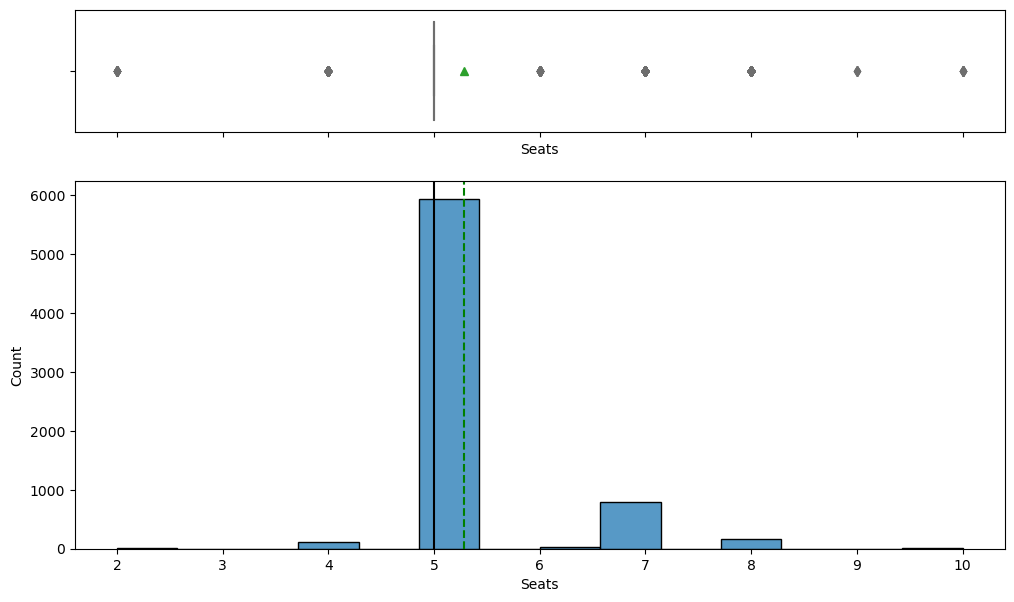

In [52]:
histogram_boxplot(data = df, feature = "Seats")

- The Seats is rightly disrtibuted with outliers after the lower quatile and upper quartile

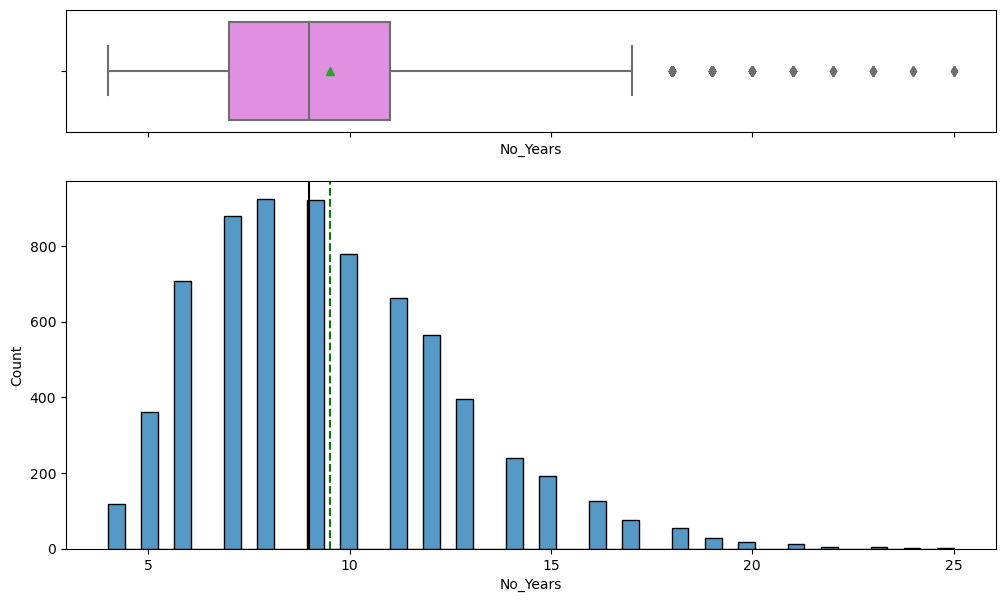

In [53]:
histogram_boxplot(data = df, feature = "No_Years")

- Number of years is rightly distributed with outliers after the upper quartile

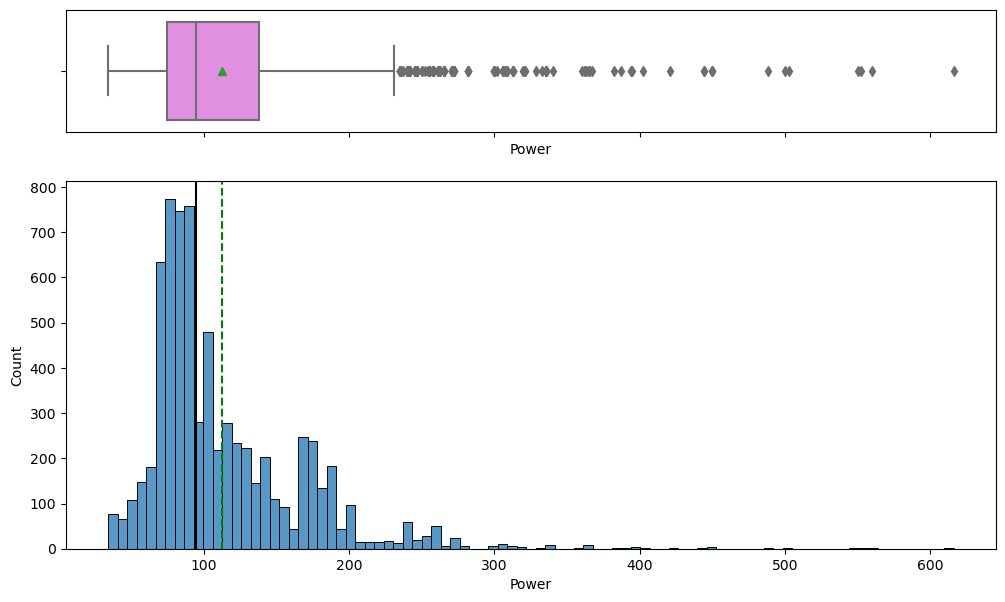

In [54]:
histogram_boxplot(data = df, feature = "Power")

-  Power is rightly distributed with outliers after the upper quartile

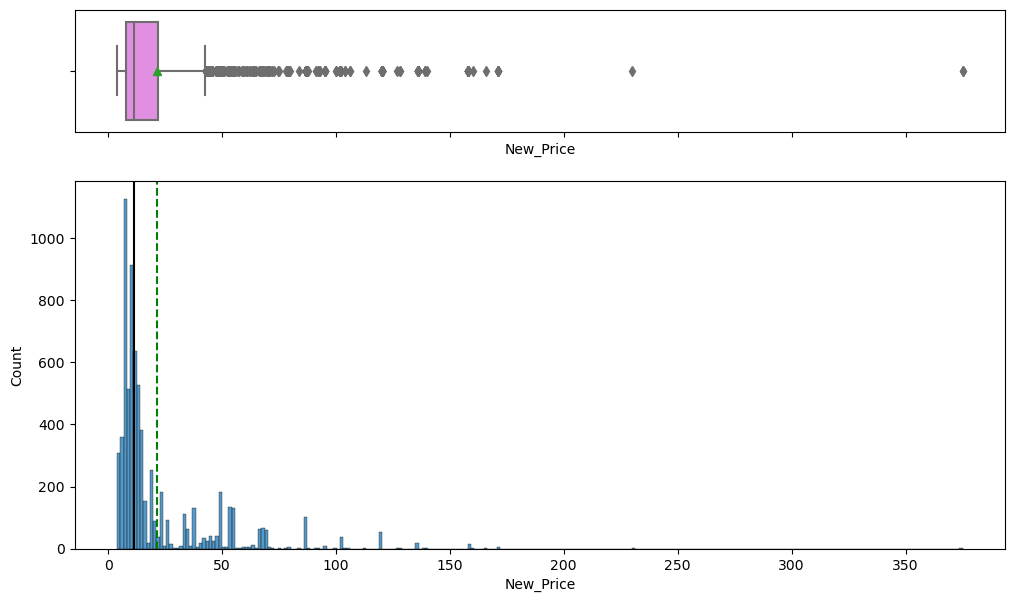

In [55]:
histogram_boxplot(data = df, feature = "New_Price")

- New Price is rightly distributed with outliers after the upper quartile

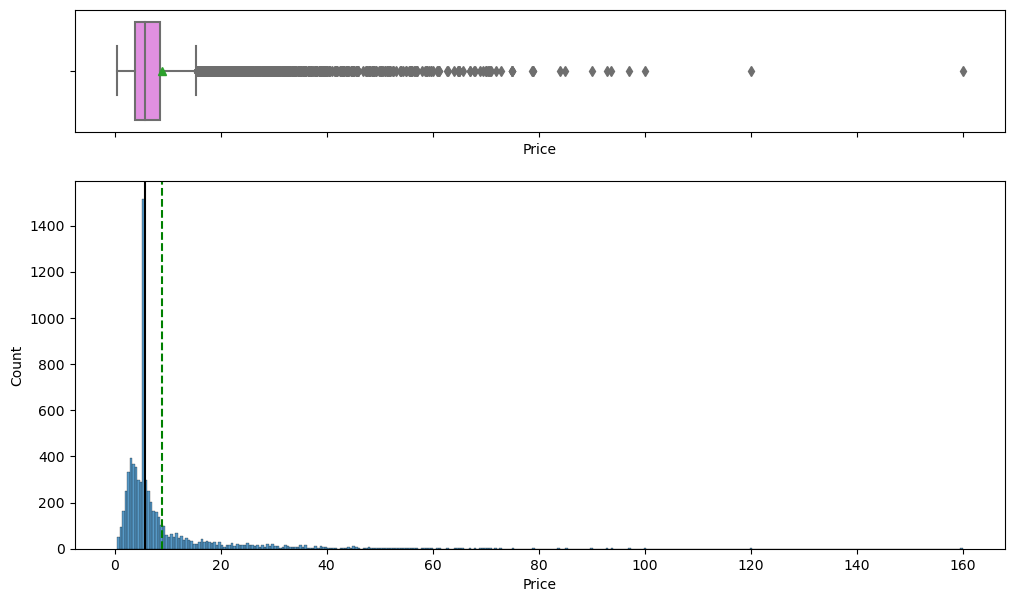

In [56]:
histogram_boxplot(data = df, feature = "Price")

- Price is rightly distributed with outliers after the upper quartile

#### Univariate Analysis: Categorical Features

- Here we create a function for labeled barplots and we use it to check the distribution of the categorical features

In [57]:
def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

In [58]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'No_Years'],
      dtype='object')

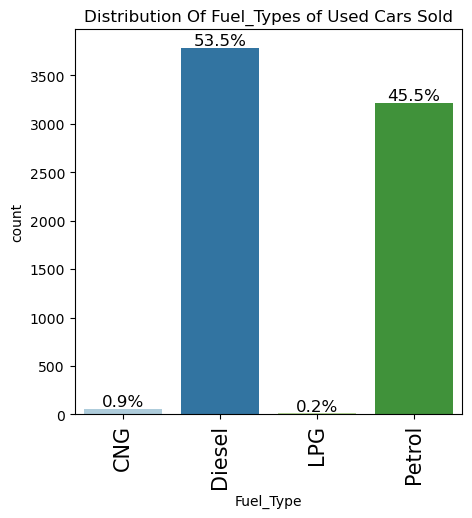

In [59]:
labeled_barplot(data = df, feature = "Fuel_Type", perc = True,
                 title = "Distribution Of Fuel_Types of Used Cars Sold")

- From the distribution above we can see that the Diesel Fuel Type is the most sold fueled type with 53.5% followed by the Petrol fuel type which has 45.5%
- The lowest fuel type sold is the LPG which has only 2%

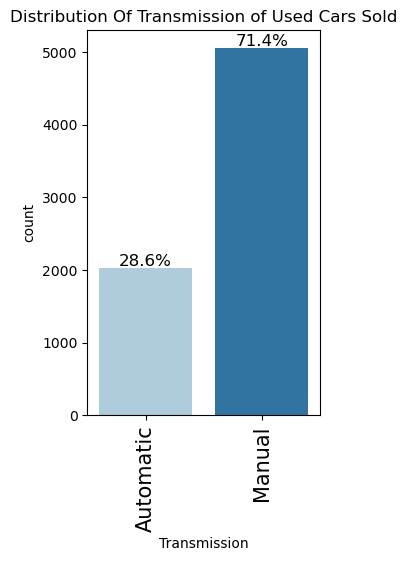

In [60]:
labeled_barplot(data = df, feature = "Transmission", perc = True,
                 title = "Distribution Of Transmission of Used Cars Sold")

- From the distribution above we can see that the Manual car transmission is the most sold  with 71.4% margin
- The automatic transmission is he least sold with 28.6%

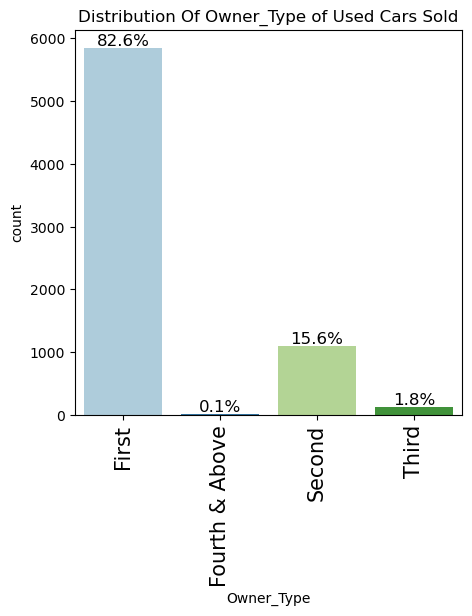

In [61]:
labeled_barplot(data = df, feature = "Owner_Type", perc = True,
                 title = "Distribution Of Owner_Type of Used Cars Sold")

-  From the distribution above we can see that the First Owner type is the most sold with 82.6% margin, followed by the second owner type with 15.6% margin
- The Fourth & above owner type is he least sold with o..1% margin

## BIVARIATE ANALYSIS

- Here we will analyse the relationship bewteen the variables


In [62]:
num_data = df.select_dtypes(include = "number")

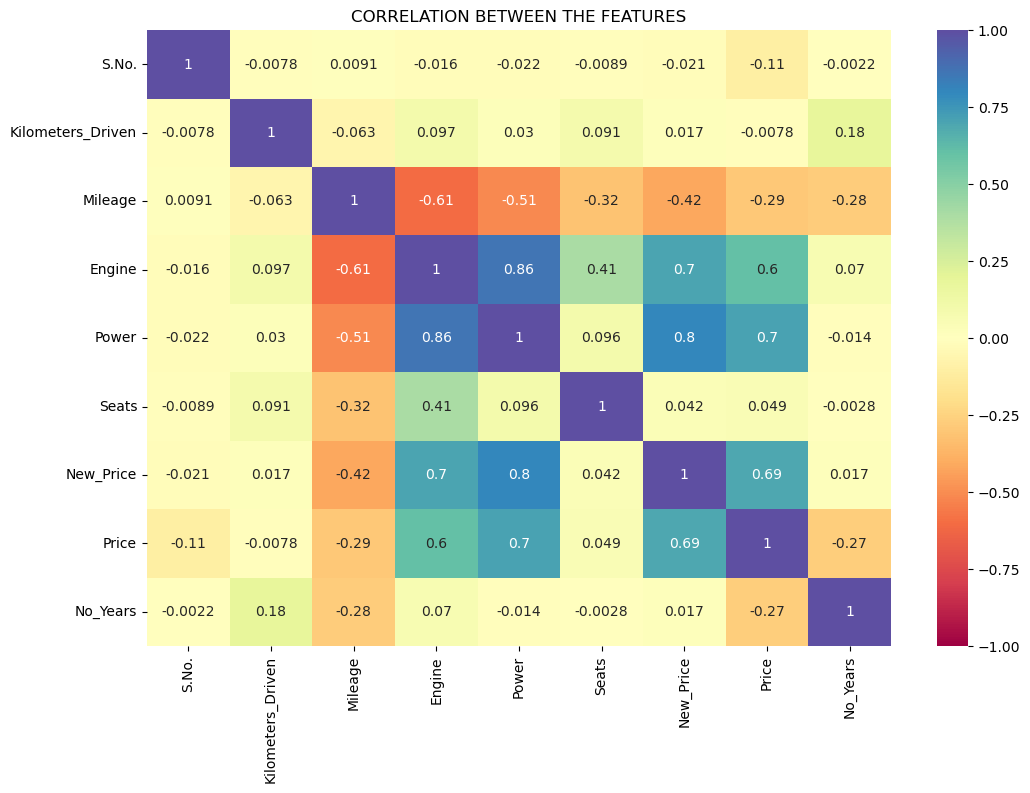

In [63]:
mat_cor = num_data.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.title("CORRELATION BETWEEN THE FEATURES")
plt.show()

- From the heat map above we can see that The Engine, Power, and New Price have a high positive correlation with our target feature, Price
- There is a negative correlation between mileage, number of years and Price
- There is a slight negative correlation between Kilometers_Driven and the Price
- There is a high positive correlation between the Engine and Power
- There is also a slightly positive correlation between the Seats and Engine
- There is a high positive correlation between the New Price, Engine and Power
- There is a low positive correlation between the Kilometers_Driven and No_Years

In [64]:
def custom_scatterplot(x, y, title, data = df):
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x = x, y = y, data = df)
    plt.title(title)
    plt.show()

### Engine Vs Price

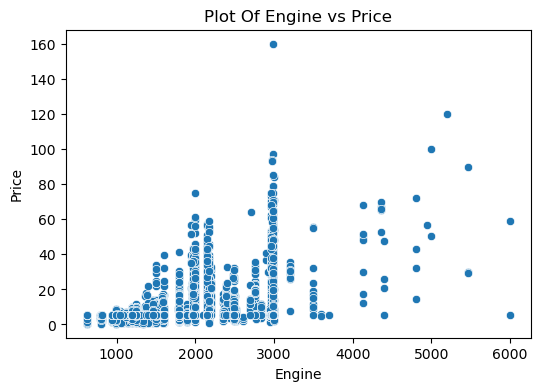

In [65]:
custom_scatterplot(x = "Engine", y = "Price", 
                    title = "Plot Of Engine vs Price")

- From the plot above, as Engine capacity increases the Price also increases. So there is a positve relationship between Engine and Price

### Power Vs Price

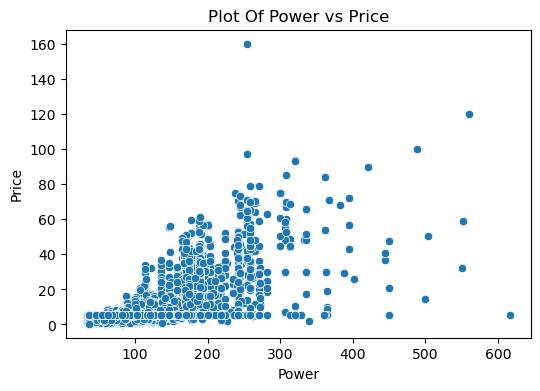

In [66]:
custom_scatterplot(x = "Power", y = "Price", 
                    title = "Plot Of Power vs Price")

- From the plot above, as the Power of the engine increases the Price also increases. So there is a positive relationship between Power and Price

### New Price vs Price

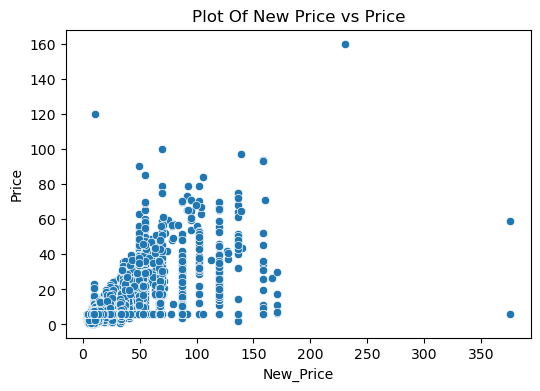

In [67]:
custom_scatterplot(x = "New_Price", y = "Price", 
                    title = "Plot Of New Price vs Price")

- From the plot above, as Engine capacity increases the Price also increases. So there is a positve relationship between Engine and Price

### Mileage vs Price

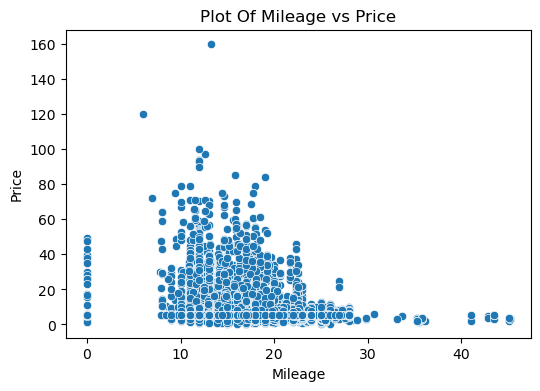

In [68]:
custom_scatterplot(x = "Mileage", y = "Price", 
                    title = "Plot Of Mileage vs Price")

- There is no  relationship between the Mileage and Price

### Number of Years vs Price

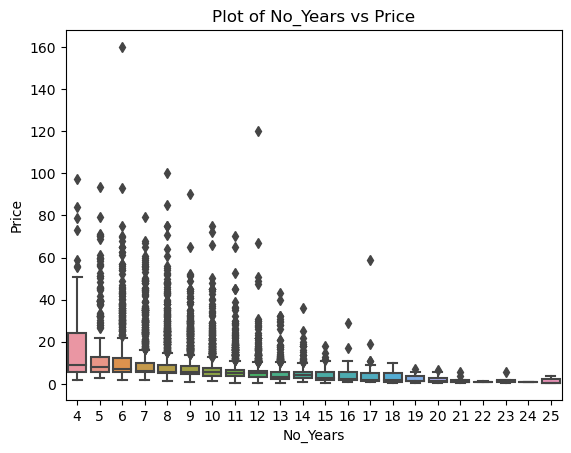

In [69]:
sns.boxplot(x = "No_Years", y = "Price", data = df)
plt.title("Plot of No_Years vs Price")
plt.show()

- There is a slighlty negative relationship between the No_Years and Price

### Seats vs Price

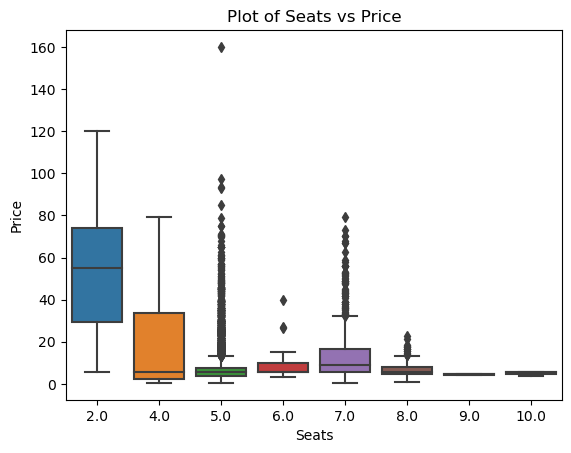

In [70]:
sns.boxplot(x = "Seats", y = "Price", data = df)
plt.title("Plot of Seats vs Price")
plt.show()

- There is no relationship between number of Seats and Price

### Kilometers Driven vs Price

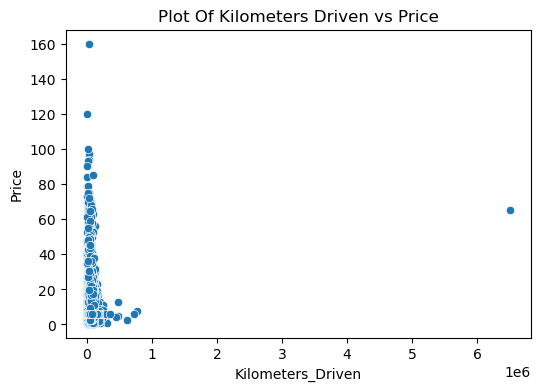

In [71]:
custom_scatterplot(x = "Kilometers_Driven", y = "Price", 
                    title = "Plot Of Kilometers Driven vs Price")

- There is no relationship between Kilometers_Driven and Price

### Outlier Detection and Handling

- Here we will remove all the outliers in the columns by clipping any value left to the lower whisker, to the lower whisker and any value on the right of the upper whisker to the upper whisker

In [72]:
num_data.drop("Price", axis = 1, inplace = True)

num_data.columns

Index(['S.No.', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'No_Years'],
      dtype='object')

In [73]:
def treat_outliers(df, col):
    """
    treat outliers in variable
    col: str, name of the numerical variable
    df: dataframe
    
    """
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df


In [74]:
df = treat_outliers_all(df, num_data)

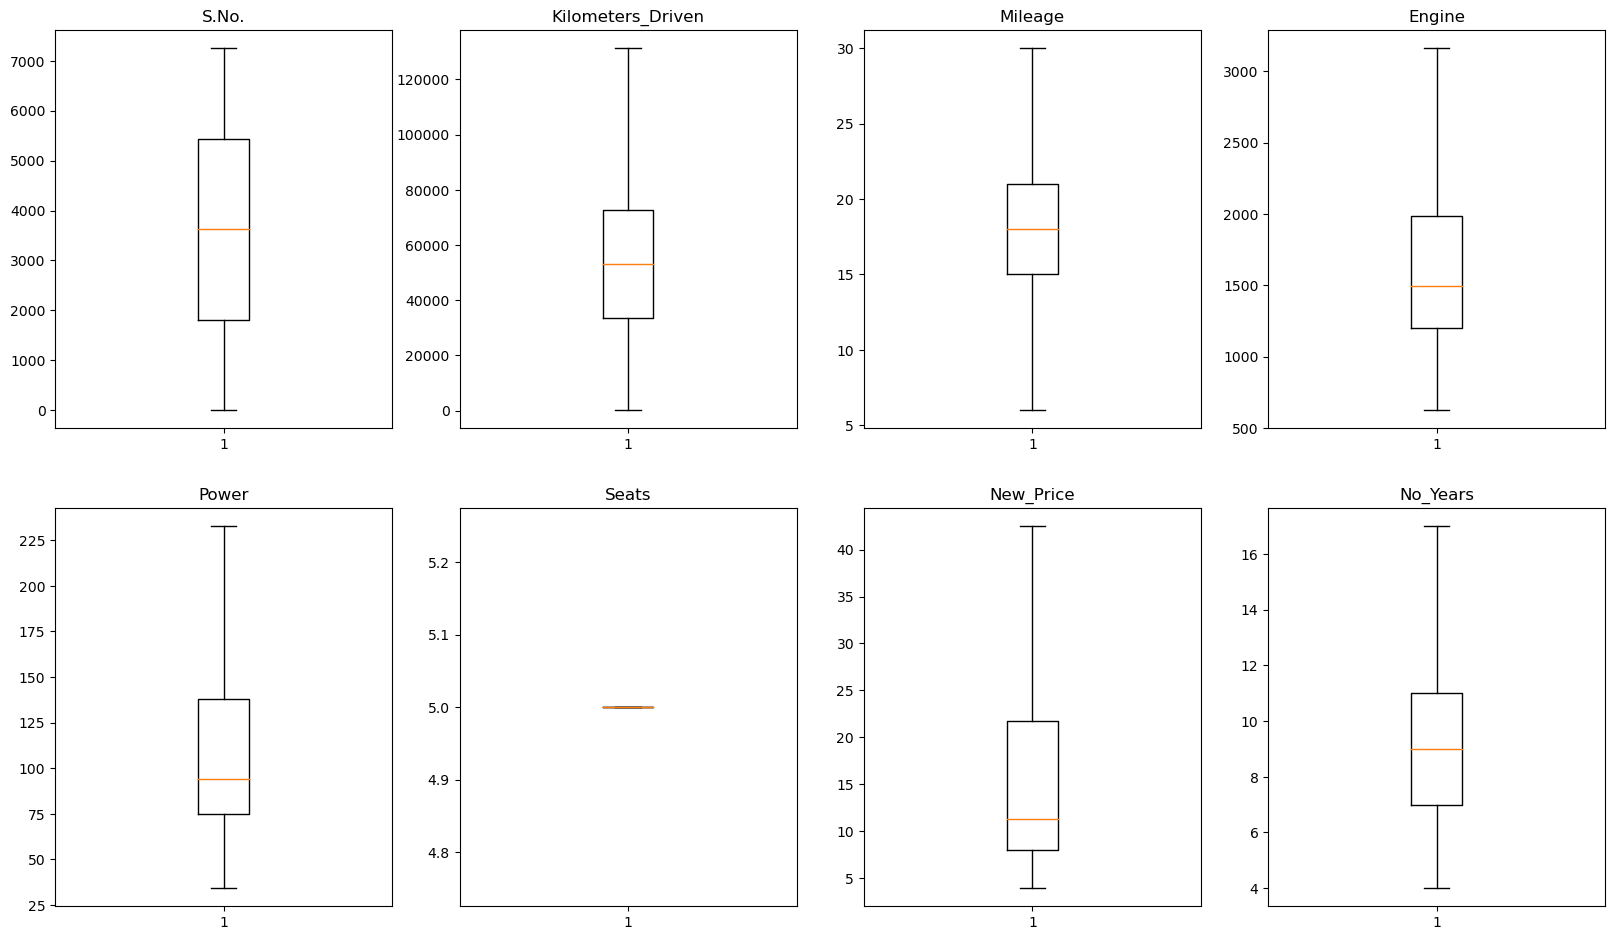

In [75]:
# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)
    
plt.show()

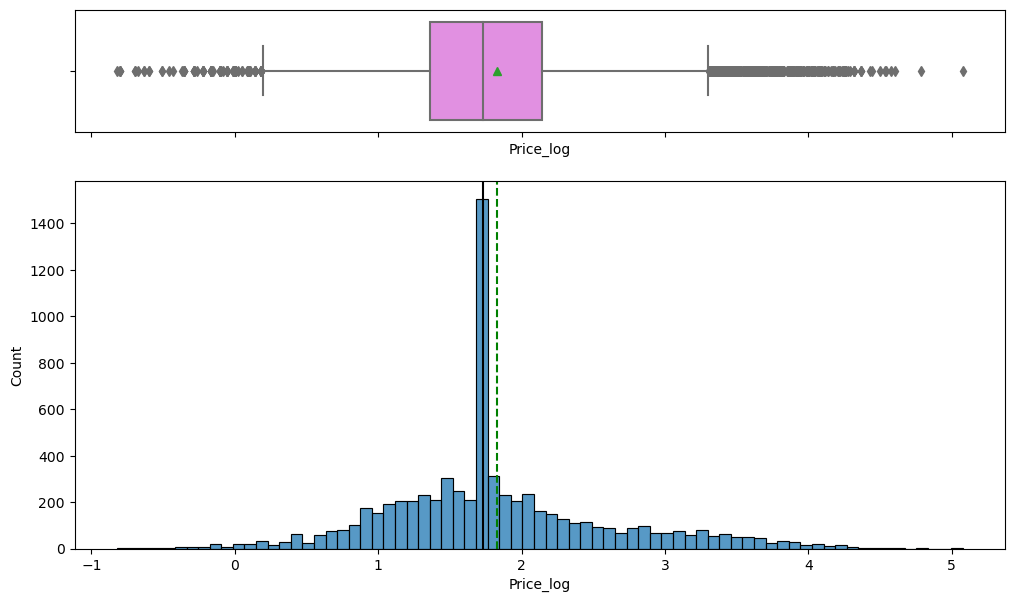

In [76]:
# transform the target using log transformation

df["Price_log"] = np.log(df["Price"])

histogram_boxplot(data = df, feature = "Price_log")

### Model Building

- Here we will import the required libraries, split our data set, create dummy vairables and build our model

In [77]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [78]:
#select features and target

X = df[["Transmission", "Owner_Type", "Engine", "Power", "Fuel_Type",
        "New_Price", "Mileage", "Seats", "No_Years", "Kilometers_Driven" ]]

y = df["Price_log"]



In [79]:
# sanity check

X.isnull().sum()

Transmission         0
Owner_Type           0
Engine               0
Power                0
Fuel_Type            0
New_Price            0
Mileage              0
Seats                0
No_Years             0
Kilometers_Driven    0
dtype: int64

### Convert categorical features to numerical data using OneHot Encoding

In [80]:
X = pd.get_dummies(X, drop_first = True)

X.head()

,Engine,Power,New_Price,Mileage,Seats,No_Years,Kilometers_Driven,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,998.0,58.16,5.510,30.0,5.0,13.0,72000.0,1,0,0,0,0,0,0
1,1582.0,126.20,16.060,19.6,5.0,8.0,41000.0,1,0,0,0,1,0,0
2,1199.0,88.70,8.610,18.0,5.0,12.0,46000.0,1,0,0,0,0,0,1
3,1248.0,88.76,11.270,20.7,5.0,11.0,87000.0,1,0,0,0,1,0,0
4,1968.0,140.80,42.515,15.0,5.0,10.0,40670.0,0,0,1,0,1,0,0


### Split Data

- Here we will split our data into the train set, validation set and test set

In [81]:
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 0)


In [82]:
x_train.shape

(4528, 14)

- Our x_train data has 4528 rows and 14 columns

In [83]:
x_val.shape

(1132, 14)

- Our x_val data has 1132 rows and 14 columns

In [84]:
x_test.shape

(1416, 14)

- Our x_test data has 1416 rows and 14 columns

### Normalize the Data

- Here we will give the variables in all the features a close range

In [85]:
scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

### Build Our Model

In [86]:
lin_reg = LinearRegression()

lin_reg.fit(x_train_sd, y_train)

LinearRegression()

### Model Performance Check

In [87]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [88]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

###### Interpreting Model Performance and Coefficients

In [89]:
lin_reg_train = model_performance_regression(lin_reg, x_train_sd, y_train)

lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.389466,0.276496,0.753849,0.753086,inf


- 75% of the variation in the price was explained by all the features in the data
- The model has a good performance with a low error 

In [90]:
lin_reg_val = model_performance_regression(lin_reg, x_val_sd, y_val)
lin_reg_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.386041,0.270713,0.776593,0.773793,inf


- Beacause the R_squared of the training is similar to that of the validation, the model is generalizing well

In [91]:
print(lin_reg.coef_)

print(x_train.columns)

[ 9.46299513e-02  2.25996308e-01  2.40430721e-01 -1.52603685e-02
 -7.28583860e-17 -3.16464829e-01 -3.14995505e-02 -3.23744479e-02
  1.52963249e-02 -1.54637048e-02 -1.66834772e-02  6.33712299e-02
  8.97323877e-03 -4.08675887e-03]
Index(['Engine', 'Power', 'New_Price', 'Mileage', 'Seats', 'No_Years',
       'Kilometers_Driven', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')


In [92]:
for i, col in enumerate(x_train.columns):
    print(f"{col} has coeeficient of {np.exp(lin_reg.coef_[i])}")

Engine has coeeficient of 1.0992520031049056
Power has coeeficient of 1.253571037534447
New_Price has coeeficient of 1.2717968215898616
Mileage has coeeficient of 0.9848554808773627
Seats has coeeficient of 0.9999999999999999
No_Years has coeeficient of 0.7287206411955562
Kilometers_Driven has coeeficient of 0.968991392063031
Transmission_Manual has coeeficient of 0.968143994667946
Owner_Type_Fourth & Above has coeeficient of 1.0154139124335726
Owner_Type_Second has coeeficient of 0.9846552444026848
Owner_Type_Third has coeeficient of 0.9834549212588352
Fuel_Type_Diesel has coeeficient of 1.0654222823961839
Fuel_Type_LPG has coeeficient of 1.0090136189694412
Fuel_Type_Petrol has coeeficient of 0.9959215805694159


- For every unit increase in the Power of the Engine, the Price will increase by 1.253571037534447
- For every unit increase in Engine capacity, the Price will increase by 1.0992520031049056
- For every unit increase in Mileage the Price will decrease by 0.9848554808773627
- For every unit increase in price of a new car of the same model, the Price will increase by 1.2717968215898616
- For every unit increase in the number of seats in the car, the Price will reduce by 1

### Using Ridge Regression

In [93]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state = 0)

ridge.fit(x_train_sd, y_train)

Ridge(random_state=0)

In [94]:
ridge_train = model_performance_regression(ridge, x_train_sd, y_train)

ridge_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.389466,0.276512,0.753849,0.753085,inf


- We can observe that the R_squared for the ridge regression is very similar to the R_squared of the linear regression

In [95]:
# using a higher alpha value to observe whether there will be any difference in the R_square
# alpha here will be 10
ridge = Ridge(random_state = 0, alpha = 10)

ridge.fit(x_train_sd, y_train)

Ridge(alpha=10, random_state=0)

In [96]:
ridge_train = model_performance_regression(ridge, x_train_sd, y_train)

ridge_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.389469,0.276653,0.753846,0.753082,inf


- There was no change in the R_squared. This means Ridge couldn't improve the performance on the Linear regression

### Using Lasso Regression 

In [97]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state = 0)

lasso.fit(x_train_sd, y_train)

Lasso(random_state=0)

In [98]:
lasso_train = model_performance_regression(lasso, x_train_sd, y_train)

lasso_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.784999,0.569675,0.0,-0.003102,inf


- Lasso turned R_squared to 0. Hence, didn't improve our model


In [99]:
alpha_values = np.linspace(0.001, 0.2, num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state = 0, alpha = alpha)
    lasso.fit(x_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd, y_train)
    print(lasso_train)
    print(alpha)

       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.389478  0.276718   0.753834         0.75307   inf
0.001
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.392878  0.284173   0.749518        0.748741   inf
0.023111111111111114
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.398094  0.293039   0.742823        0.742025   inf
0.045222222222222226
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.405714  0.303165   0.732883        0.732055   inf
0.06733333333333334
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.415856  0.314454   0.719361         0.71849   inf
0.08944444444444445
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.427892  0.326305   0.702881        0.701959   inf
0.11155555555555556
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.441847  0.338725   0.683185        0.682203   inf
0.13366666666666668
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.457691  0.351824   0.660056        0.65900

- The alpha value for lasso from the above is 0.001. It gave an R_squared of 0.753834. Still similar to the R_squared value of the linear regression model

In [102]:
lasso = Lasso(random_state = 0, alpha = 0.001)

lasso.fit(x_val_sd, y_val)

lasso_val = model_performance_regression(lasso, x_val_sd, y_val)

lasso_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.384347,0.269001,0.778548,0.775773,inf


- The R_squared for the train set on the lasso regression model and that of the validation set are very similar. Hence, it is generalizing well

### We Test Our Best Model

- Our linear regression model is our best model and here, we will test model on this data

In [117]:
reg_train = model_performance_regression(lin_reg, x_train_sd, y_train)

reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.389466,0.276496,0.753849,0.753086,inf


In [118]:
reg_val = model_performance_regression(lin_reg, x_val_sd, y_val)
reg_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.386041,0.270713,0.776593,0.773793,inf


In [119]:
reg_test = model_performance_regression(lin_reg, x_test_sd, y_test)
reg_test


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.392183,0.273066,0.744518,0.741965,inf


- Using our best model we can see that our R_squared is 0.7445 which is close to our R_squared our train set.
- This means our model is genearalizing well, hence it"s performing well

### FINAL BUSINESS TAKEAWAYS

- From the above model we can see that the Engine and Power had significant impact on the Price of the cars sold. As such, the business should focus more on selling used cars with high engine capacity and engine power


- Also, the price of new cars of the same model also had a positive impact on the Price. That means that the higher the new car price the higher the sale of the used car of the same model. Hence, the business should look out for used cars which have a higher new price


- The Manual Transmission is the highest selling, hence more manual cars should be bought and sold


- The mileage and seats had a negative impact on the price of the used cars. This means that customers are looking for used cars with lower number of seats and less mileage


- The Diesel Fuel Type is highly sought out for. More used diesel cars should be bought as they have a huge demand